In [59]:
# This tutorial demonstrates Linear Regression with a 'Toy dataset'

In [60]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [71]:
# initialize data
np.random.seed(1)
torch.manual_seed(1)
X_np = np.random.rand(30, 1) * 2
w = np.random.rand(2, 1)
y = X_np * w[0] + w[1] + np.random.randn(30, 1) * 0.05

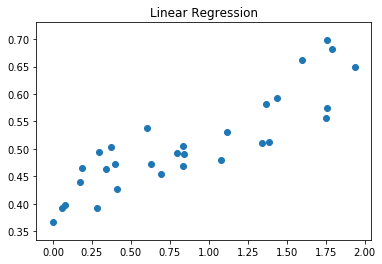

In [72]:
# Visualize data
plt.scatter(X_np, y)
plt.title('Linear Regression')
plt.show()

In [73]:
x_var = Variable(torch.FloatTensor(X_np))
y_var = Variable(torch.FloatTensor(y))
w = Variable(torch.randn(1), requires_grad=True)
b = Variable(torch.randn(1), requires_grad=True)
learning_rate = 0.005

In [74]:
def linear_regression(x):
    return w * x + b

In [75]:
for e in range(1500):
    y_pred = linear_regression(x_var)
    # print(y_pred, y_var)
    loss = torch.mean((y_pred - y_var) ** 2)
    # print(loss)
    loss.backward()
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()

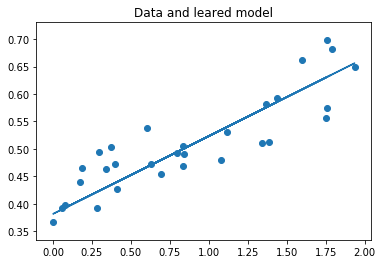

In [76]:
plt.scatter(X_np, y)
plt.plot(X_np, linear_regression(x_var).data.numpy())
plt.title('Data and leared model')
plt.show()